
# Project: Investigate a Dataset (TMDb )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset comes from IMDB and contains information about 10,000 movies.In this project I analyze a movie dataset which is collected from 1960 to 2015 with the information of budget, revenue, genres, release date, release year, runtime, etc,using basic data analysis technique with Pandas, NumPy, Matplotlib.

#### In this project, I’ll be answering the following questions:

>•	What month is considered best for releasing a films/shows?

>•  Which year has the highest release of movies?

>• Which length movies most liked by the audiences according to their popularity ?

>•  Which genre Has the highest release of movies?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>After Observing the dataset and questions about this dataset for analysis, we will clean up the data and we will only keep the relevant data and delete the unused data.
### General Properties

In [2]:
# Read the CSV File Using Pandas read_csv function
df= pd.read_csv('tmdb-movies.csv')
df.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08


In [3]:
# this function show how many columns and rows 
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning ( Drop Unecessary Columns)

>Remove columns that are not useful for answering questions (imdb_id, Budget, Revenue,Homepage, Tagline, Keywords, cast,production_companies and Overview)

In [6]:
# list of columns that are to be deleted
col =['imdb_id','budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies']

# deleting the columns
df.drop(col, axis = 1, inplace = True)

#checking to see if the columns have been deleted
df.columns

Index(['id', 'popularity', 'original_title', 'runtime', 'genres',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [7]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning ( Filling 0 Values)

>According to the data above, budget_adj, revenue_adj and runtime all contain
values of 0. Fill these in with the average of each column.

In [8]:
# Get average of budget_adj
print(df['budget_adj'].mean())

17551039.82290045


In [9]:
# Replace 0 values with mean.
df['budget_adj'] = df['budget_adj'].replace(0, 17551039.82290045)

In [10]:
# Get average of revenue_adj
print(df['revenue_adj'].mean())

51364363.253164716


In [11]:
# Replace 0 values with mean
df['revenue_adj'] = df['revenue_adj'].replace(0, 51364363.253164716)

In [12]:
# Get average of runtime
print(df['runtime'].mean())

102.07086324314375


In [13]:
# Replace 0 values with mean
df['runtime'] = df['runtime'].replace(0, 102.07086324314375)
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.362065,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07
std,92130.136561,1.000185,30.902781,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   runtime         10866 non-null  float64
 4   genres          10843 non-null  object 
 5   release_date    10866 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 933.9+ KB


In [15]:
#count total rows in each column which contain null values
df.isna().sum()

id                 0
popularity         0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [16]:
df[df.genres.isnull()]

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,Belli di papÃ,100.000000,NaN,10/29/15,21,6.1,2015,1.755104e+07,5.136436e+07
620,361043,0.129696,All Hallows' Eve 2,90.000000,NaN,10/06/2015,13,5.0,2015,1.755104e+07,5.136436e+07
997,287663,0.330431,Star Wars Rebels: Spark of Rebellion,44.000000,NaN,10/03/2014,13,6.8,2014,1.755104e+07,5.136436e+07
1712,21634,0.302095,Prayers for Bobby,88.000000,NaN,2/27/09,57,7.4,2009,1.755104e+07,5.136436e+07
1897,40534,0.020701,Jonas Brothers: The Concert Experience,76.000000,NaN,2/27/09,11,7.0,2009,1.755104e+07,5.136436e+07
2370,127717,0.081892,Freshman Father,102.070863,NaN,06/05/2010,12,5.8,2010,1.755104e+07,5.136436e+07
2376,315620,0.068411,Doctor Who: A Christmas Carol,62.000000,NaN,12/25/10,11,7.7,2010,1.755104e+07,5.136436e+07
2853,57892,0.130018,Vizontele,110.000000,NaN,02/02/2001,12,7.2,2001,1.755104e+07,5.136436e+07
3279,54330,0.145331,ì•„ê¸°ì™€ ë‚˜,96.000000,NaN,8/13/08,11,6.1,2008,1.755104e+07,5.136436e+07
4547,123024,0.520520,London 2012 Olympic Opening Ceremony: Isles of...,220.000000,NaN,7/27/12,12,8.3,2012,1.755104e+07,5.136436e+07


In [17]:
#This function deletes all rows that have a null value
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10843 non-null  int64  
 1   popularity      10843 non-null  float64
 2   original_title  10843 non-null  object 
 3   runtime         10843 non-null  float64
 4   genres          10843 non-null  object 
 5   release_date    10843 non-null  object 
 6   vote_count      10843 non-null  int64  
 7   vote_average    10843 non-null  float64
 8   release_year    10843 non-null  int64  
 9   budget_adj      10843 non-null  float64
 10  revenue_adj     10843 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1016.5+ KB


In [18]:
#count total rows in each column which contain null values
df.isna().sum()

id                0
popularity        0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### Data Cleaning (Cleaning Duplicates)
>Find and remove duplicate rows

In [19]:
sum(df.duplicated())

1

In [20]:
#After calculating the duplicate row we can drop these row using 'drop_duplicates()' function

df.drop_duplicates(keep ='first' ,inplace = True)

#afetr removing duplicate value from the dataset

df.shape

(10842, 11)

### Data Cleaning ( Changing Datatypes)

>Change datatypes of columns to appropriate kinds. Ex. 'release_date' needs to be
datetime

In [21]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                         int64
popularity               float64
original_title            object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis
>Now the data is ready to be used to answer questions, study the statistics and build visualization to study relationships between each others


###  Question 1  (What month is considered best for releasing a film/show?)

In [22]:
#First, I'm going to create a new column called "month"
# Then i'll extract the month from release_date.
df['month'] = df['release_date'].apply(lambda y: y.month)
df.head(2)

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,135397,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,6
1,76341,28.419936,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,5


In [23]:
# Group by month and sum the revenues.
mo_revenue_adj = df.groupby('month')['revenue_adj'].sum()
mo_revenue_adj

month
1     4.895277e+10
2     4.214897e+10
3     6.380589e+10
4     5.487055e+10
5     8.418096e+10
6     1.020808e+11
7     7.982522e+10
8     5.747161e+10
9     6.799156e+10
10    7.398933e+10
11    8.171477e+10
12    1.089184e+11
Name: revenue_adj, dtype: float64

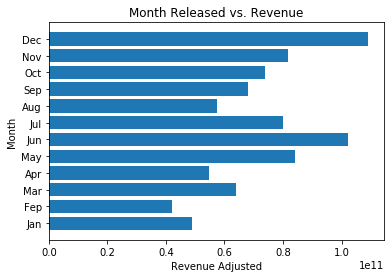

In [24]:
# Now plot these in a barh chart.
plt.barh ([1,2,3,4,5,6,7,8,9,10,11,12], mo_revenue_adj, tick_label = ['Jan','Fep','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Month Released vs. Revenue')
plt.ylabel('Month')
plt.xlabel( 'Revenue Adjusted');



>From this chart, we can see that 6(June) and 12(December) have the highest revenue for
movie releases.

### Question 2  ( Which year has the highest release of movies?)

release_year
2009    531
2010    487
2011    540
2012    584
2013    656
2014    699
2015    627
Name: id, dtype: int64


Text(0, 0.5, 'Number Of Movies')

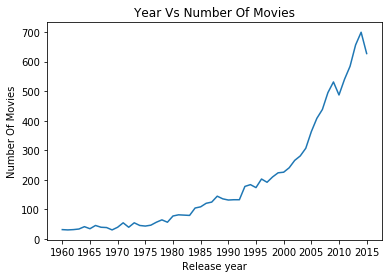

In [25]:
# make group for each year and count the number of movies in each year 
d=df.groupby('release_year').count()['id']
print(d.tail(7))

#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks=np.arange(1960,2016,5))

#set the labels
plt.title("Year Vs Number Of Movies")
plt.xlabel('Release year')
plt.ylabel('Number Of Movies')







>We can infer from the plot that  2014 is the highest year for release of movies(699),followed by year 2013(656) and after  2013 comes in 2015 (627).


### Question 3  (Which length movies most liked by the audiences according to their popularity?)

Text(0, 0.5, 'Average Popularity')

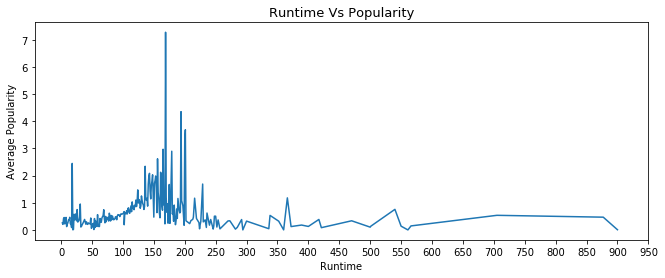

In [26]:

#make the group of the data according to their runtime and find the mean popularity related to this and plot.
df.groupby('runtime')['popularity'].mean().plot( figsize = (11,4),xticks=np.arange(0,1000,50))

#make a plot using their popularity and find which length movies are most popular.
#setup the title and the labels of the plot.

plt.title("Runtime Vs Popularity",fontsize = 13)
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')




>According to the plot we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.



### Question 4  (Which Genre Has The Highest Release Of Movies? )

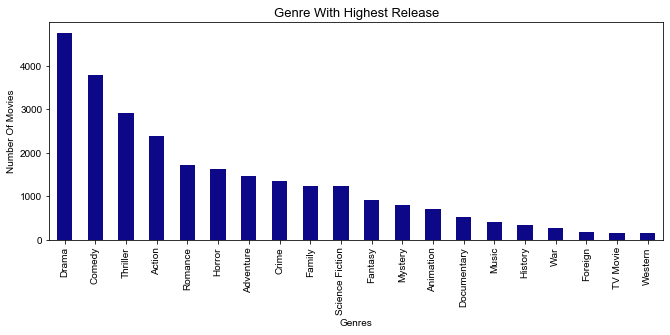

In [27]:
#make a function will will split the string and return the count of each genre.
def count_gen(y):
    #concatenate all the rows of the genres.
    data_plot = df[y].str.cat(sep = '|')
    DATA = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = DATA.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_GenreMovies = count_gen('genres')
#plot a 'bar' plot using plot function for 'genre vs number of movies'.
total_GenreMovies.plot( figsize = (11,4),kind= 'bar',colormap='plasma')

# plot.
plt.title("Genre With Highest Release",fontsize=13)
plt.xlabel('Genres')
plt.ylabel('Number Of Movies')
sns.set_style("darkgrid")


>According to the plot Drama genre has the highest release of movies followed by Comedy and Thriller.

<a id='conclusions'></a>
## Conclusions

>    I analyzed the data set (TMDB) collected from 1960 to 2015 by putting some questions to some conclusion. After (Data Wrangling) the data was cleaned where I deleted columns that I don't need in the analysis and removed any of the Duplicate value, the NULL value and the values 0 and also corrected the types of erroneous data to have more accurate data and results, and i also added some columns such as month".
We can summarize the results of this analysis in the following items:

>• The best months for the release of movies are December, John and May.

>• The year with the highest release of movies 2014 and then followed by 2013.

>• Movie runtime that the audience likes from 100-200 minutes because it's boring to see long-term movies.

>• Genres that have the highest release of movies: the first genre is drama, the second is comedy and the third is thriller.

## Limitiations

>•  Although we successfully predicted the above properties on TMDb movie dataset, there are many Rows with NaN values have been dropped, so a lot of key data may have been lost in this process.

>• A significant percentage of movies with zero value for budget_adj or revenue_adj from The dataset,the zero value greatly impact the results. Where I replaced zero values with mean.
